<a href="https://colab.research.google.com/github/SmitaPaul7000/CaseStudies/blob/master/1.0%20Image%20Captioning/Code/SB_Capstone_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flicker data

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import random
import pandas as pd
import re
from scipy.sparse import csr_matrix
from scipy.sparse import vstack
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
train_images_list = os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/flickr30k_images/flickr30k_images')

In [87]:
len(train_images_list)

31835

In [0]:
sample_size = 30
train_images_list = train_images_list[:sample_size]

In [0]:
size = (256, 256)
num_channels  = 3

In [0]:
#create blank arrays for 30, for texta nd images.
train = np.array([None]*sample_size)
real_images = np.array([None] * sample_size)

In [0]:
#loop for saving 30 images and its text to array
#plt.imread :  read images
j = 0
for i in train_images_list:    
    real_images[j] = np.array(plt.imread('/content/drive/My Drive/Colab Notebooks/dataset/flickr30k_images/flickr30k_images/' + i))
    train[j] = np.array(plt.imread('/content/drive/My Drive/Colab Notebooks/dataset/flickr30k_images/flickr30k_images/' + i))
    j += 1

In [92]:
train[1].shape #(500, 333, 3)
train[13].shape #(333, 500, 3)

(357, 500, 3)

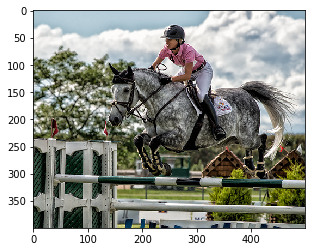

In [93]:
plt.imshow(np.squeeze(train[4]))
plt.show()

In [0]:
# cv2.resize: changing dimensions fo image, be it width alone, height alone or both. 
# Also, the aspect ratio of the original image could be preserved in the resized image. 
# why change in dimension??
j = 0

for i in train:   
    train[j] = cv2.resize(i, size)
    train[j] = train[j].reshape(1, size[0], size[1], num_channels)
    j += 1

In [95]:
train[1].shape

(1, 256, 256, 3)

In [0]:
train = np.vstack(train[:])

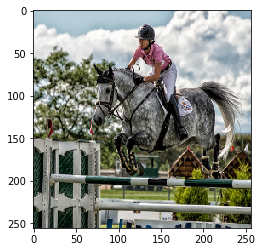

In [97]:
plt.imshow(np.squeeze(train[4]))
plt.show()

In [0]:
train_captions = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/flickr30k_images/flickr30k_images/results.csv', delimiter='|')

In [0]:
#get images id
def get_images_id(names):
    names = [int(x.split('_')[-1].split('.')[0]) for x in names]
    return names

In [0]:
ids = get_images_id(train_images_list[:sample_size])

In [0]:
train_captions.columns = ['image_name', 'comment_number', 'comment']

In [0]:
#fetch caption for image snad keep them in list
def images_map_caption(train_images_list, train_captions):
    caption = []
    for i in train_images_list:
        caption.append(train_captions[train_captions['image_name'] == i]['comment'].iat[0])
    return caption

In [103]:
captions = np.array(images_map_caption(train_images_list, train_captions))
print(captions.shape)

(30,)


In [104]:
captions[4]

' A woman in a pink shirt riding a black and white horse jumps over a black and white striped pole .'

In [0]:
start_tag = '<s>'
end_tag = '<e>'

In [0]:
def get_vocab(captions):
    arr = []
    
    #size for captions, our case it is 30
    m = captions.shape[0] 
    
    sentence = [None ] * m
    j  = 0
    
    for i in captions:
        i = re.sub(' +',' ',i)
        i = start_tag + ' ' + i + ' ' + end_tag
        sentence[j] = i.split()
        j += 1
        arr = arr + i.split()
    arr = list(set(arr))
    vocab_size = len(arr)
    j = 0
    fwd_dict = {}
    rev_dict = {}
    j = 0
    for i in arr:
        fwd_dict[i] = j
        rev_dict[j] = i
        j += 1
    return vocab_size, sentence, fwd_dict, rev_dict

In [0]:
vocab_size, sentences, fwd_dict, rev_dict = get_vocab(captions)

In [108]:
print(vocab_size)
print(sentences[0])
print(fwd_dict)
rev_dict

287
['<s>', 'On', 'a', 'clear', 'blue', 'day', ',', 'an', 'ocean', 'surfer', 'catches', 'a', 'wave', 'and', 'delicately', 'maintains', 'his', 'balance', 'on', 'the', 'surfboard', 'as', 'he', 'rides', 'towards', 'the', 'shore', '.', '<e>']
{'ride': 0, 'gets': 1, 'background': 2, 'front': 3, 'seated': 4, 'her': 5, "11'": 6, 'runners': 7, 'descent': 8, 'falling': 9, 'phrase': 10, 'onlookers': 11, 'picture': 12, 'floor': 13, 'pole': 14, 'puck': 15, 'out': 16, '<e>': 17, 'board': 18, 'is': 19, 'as': 20, 'catches': 21, 'young': 22, 'female': 23, 'Indian': 24, 'blue': 25, 'deals': 26, 'Asian': 27, 'four': 28, 'stage': 29, 'him': 30, 'with': 31, 'tent': 32, 'running': 33, 'yellow': 34, 'playing': 35, 'group': 36, 'perform': 37, 'up': 38, 'wave': 39, 'shore': 40, 'KitchenAid': 41, 'spectators': 42, 'boy': 43, 'blue-eyed': 44, 'An': 45, 'choreography': 46, 'grass': 47, 'Crazy': 48, 'number': 49, 'player': 50, 'to': 51, 'of': 52, 'hippie': 53, 'water': 54, 'she': 55, 'sports': 56, 'an': 57, 'hamm

{0: 'ride',
 1: 'gets',
 2: 'background',
 3: 'front',
 4: 'seated',
 5: 'her',
 6: "11'",
 7: 'runners',
 8: 'descent',
 9: 'falling',
 10: 'phrase',
 11: 'onlookers',
 12: 'picture',
 13: 'floor',
 14: 'pole',
 15: 'puck',
 16: 'out',
 17: '<e>',
 18: 'board',
 19: 'is',
 20: 'as',
 21: 'catches',
 22: 'young',
 23: 'female',
 24: 'Indian',
 25: 'blue',
 26: 'deals',
 27: 'Asian',
 28: 'four',
 29: 'stage',
 30: 'him',
 31: 'with',
 32: 'tent',
 33: 'running',
 34: 'yellow',
 35: 'playing',
 36: 'group',
 37: 'perform',
 38: 'up',
 39: 'wave',
 40: 'shore',
 41: 'KitchenAid',
 42: 'spectators',
 43: 'boy',
 44: 'blue-eyed',
 45: 'An',
 46: 'choreography',
 47: 'grass',
 48: 'Crazy',
 49: 'number',
 50: 'player',
 51: 'to',
 52: 'of',
 53: 'hippie',
 54: 'water',
 55: 'she',
 56: 'sports',
 57: 'an',
 58: 'hammers',
 59: 'boys',
 60: 'players',
 61: 'clothes',
 62: 'surfboard',
 63: 'prepares',
 64: 'it',
 65: 'fairgrounds',
 66: 'Monopoly',
 67: 'pointing',
 68: 'body',
 69: 'dirt',


In [0]:
m = len(sentences)
train_caption = [None] * m
i = 0
for sentence in sentences:
    cap_array = None
    for word in sentence:
        row = [0]
        col = [fwd_dict[word]]
        data = [1]
        if cap_array is None:
            cap_array = csr_matrix((data, (row, col)), shape=(1, vocab_size))
        else:
            cap_array = vstack((cap_array, csr_matrix((data, (row, col)), shape=(1, vocab_size))))
    train_caption[i] = cap_array
    i += 1

In [110]:
train_caption[0].shape


(29, 287)

In [0]:
def create_weights(shape, suffix):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.7), name='W_' + suffix)

def create_biases(size, suffix):
    return tf.Variable(tf.zeros([size]), name='b_' + suffix)

def conv_layer(inp, kernel_shape, num_channels, num_kernels, suffix):
    filter_shape = [kernel_shape[0], kernel_shape[1], num_channels, num_kernels]
    weights = create_weights(shape=filter_shape, suffix=suffix)
    biases = create_biases(num_kernels, suffix=suffix)
    layer = tf.nn.conv2d(input=inp, filter=weights, padding='SAME', strides=[1, 1, 1, 1], name='conv_' + suffix)
    layer += biases
    layer = tf.nn.relu6(layer, name='relu_' + suffix)
    #layer = tf.nn.max_pool(layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2,1], padding= 'SAME')
    return layer

def flatten_layer(layer, suffix):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer = tf.reshape(layer, [-1, num_features], name='flat_' + suffix )
    return layer
def dense_layer(inp, num_inputs, num_outputs, suffix, use_relu=True):
    weights = create_weights([num_inputs, num_outputs], suffix)
    biases = create_biases(num_outputs, suffix)
    layer = tf.matmul(inp, weights) + biases
    layer = tf.nn.relu(layer)
    return layer
def rnn_cell(Win ,Wout, Wfwd, b, hprev, inp):
    h = tf.tanh(tf.add(tf.add(tf.matmul(inp, Win), tf.matmul(hprev, Wfwd)), b))
    out = tf.matmul(h, Wo)
    return h, out

In [0]:
# learning_rate = 0.0001
# training_iters = 5000
# display_step = 1000
# max_sent_limit = 50
# num_tests = 12
# bridge_size = 1024
# keep_prob = 0.3

learning_rate = 0.001
training_iters = 50
display_step = 100
max_sent_limit = 50
num_tests = 12
bridge_size = 1024
keep_prob = 0.3

In [0]:
import tensorflow as tf

In [0]:
x_caption = tf.placeholder(tf.float32, [None, vocab_size], name = 'x_caption')
x_inp = tf.placeholder(tf.float32, shape=[1, size[0],size[1],num_channels], name='x_image')
y = tf.placeholder(tf.float32, [None, vocab_size], name = 'x_caption')

In [0]:
Wconv = tf.Variable(tf.truncated_normal([bridge_size, vocab_size], stddev=0.7))
bconv = tf.Variable(tf.zeros([1, vocab_size]))
Wi= tf.Variable(tf.truncated_normal([vocab_size, vocab_size], stddev=0.7))
Wf= tf.Variable(tf.truncated_normal([vocab_size, vocab_size], stddev=0.7))
Wo= tf.Variable(tf.truncated_normal([vocab_size, vocab_size], stddev=0.7))
b = tf.Variable(tf.zeros([1, vocab_size]))

In [0]:
layer_conv1 = conv_layer(inp=x_inp, kernel_shape=(3, 3), num_kernels=32, num_channels=3, suffix='1')
layer_conv2 = conv_layer(inp=layer_conv1, kernel_shape=(3, 3), num_kernels=32, num_channels=32, suffix='2')
maxpool1 = tf.nn.max_pool(layer_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2,1], padding= 'SAME')
layer_conv3 = conv_layer(inp=maxpool1, kernel_shape=(3, 3), num_kernels=64, num_channels=32, suffix='3')
layer_conv4 = conv_layer(inp=layer_conv3, kernel_shape=(3, 3), num_kernels=64, num_channels=64, suffix='4')
maxpool2 = tf.nn.max_pool(layer_conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2,1], padding= 'SAME')
layer_conv5 = conv_layer(inp=maxpool2, kernel_shape=(3, 3), num_kernels=128, num_channels=64, suffix='5')
layer_conv6 = conv_layer(inp=layer_conv5, kernel_shape=(3, 3), num_kernels=128, num_channels=128, suffix='6')
maxpool3 = tf.nn.max_pool(layer_conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2,1], padding= 'SAME')
layer_conv7 = conv_layer(inp=maxpool3, kernel_shape=(3, 3), num_kernels=256, num_channels=128, suffix='7')
layer_conv8 = conv_layer(inp=layer_conv7, kernel_shape=(3, 3), num_kernels=256, num_channels=256, suffix='8')

In [0]:
flat_layer = flatten_layer(layer_conv8, suffix='9')
#flat_layer = tf.layers.dropout(flat_layer, rate= keep_prob)
dense_layer_1 = dense_layer(inp=flat_layer, num_inputs=262144 , num_outputs=bridge_size, suffix='10')

In [0]:
start_hook = tf.cast(csr_matrix(([1], ([0], [fwd_dict[start_tag]])), shape=(1, vocab_size)).A, tf.float32)
end_hook = tf.cast(csr_matrix(([1], ([0], [fwd_dict[end_tag]])), shape=(1, vocab_size)).A, tf.float32)

In [0]:
hook = tf.slice(x_caption, [0, 0], [1, vocab_size])
h = dense_layer_1
h, out = rnn_cell(Wi ,Wo, Wconv, bconv, h, hook)

In [0]:
def fn(prev, curr):
    h = prev[0]
    curr = tf.reshape(curr, [1, vocab_size])
    h, out = rnn_cell(Wi ,Wo, Wf, b, h, curr)
    return h, out

In [0]:
_, output = tf.scan(fn, x_caption[1:], initializer=(h, out))

In [0]:
output = tf.squeeze(output, axis  = 1)

In [0]:
outputs = tf.concat([out, output], axis = 0)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=outputs, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:
pred = tf.nn.softmax(outputs)

In [0]:
# Model evaluation
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Model


In [0]:
out_tensor = tf.TensorArray(dtype=tf.float32, dynamic_size=True, size = 0)

In [0]:
htest = dense_layer_1
htest, out_first = rnn_cell(Wi ,Wo, Wconv, bconv, htest, start_hook)
t = 0
out_ = tf.one_hot(tf.argmax(tf.nn.softmax(out_first), 1), depth=vocab_size)
out_tensor = out_tensor.write(t, out_)
t += 1

In [0]:
def condition(res, h, out_tensor, t):
    return tf.logical_and(tf.logical_not(tf.equal(tf.argmax(res, 1)[0], fwd_dict[end_tag])), tf.less(t, max_sent_limit))

In [0]:
def action(res, h, out_tensor, t):
    h, out = rnn_cell(Wi ,Wo, Wf, b, h, res)
    res = tf.one_hot(tf.argmax(tf.nn.softmax(out), 1), depth=vocab_size)
    out_tensor = out_tensor.write(t, res)
    return res, h, out_tensor, t + 1

In [0]:
_, __, final_outputs, T = tf.while_loop(condition, action, [out_, htest, out_tensor, t])

In [0]:
final_prediction = tf.squeeze(final_outputs.stack())

In [0]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()

# Model Implemetation

Optimization finished!
Let's check
(50, 287)
Predicted Caption:-> A group wearing an clothes two team along Indian hat items women body jerseys jumps helmet Two and of ground the through horse colored one shirt little 'Scrambler her colored red girls his her anvil water a hair surfer towards be clear Monopoly side black choreography body dives reflecting 
Orignal Caption:-> Four men and one woman in blue outfits are standing together in a street with onlookers in the background . 


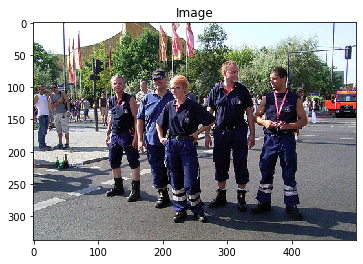

(13, 287)
Predicted Caption:-> Two person in white red to the to dirt wearing holding Four 
Orignal Caption:-> A surfer balances on a surfboard while another surfer is not on his board in the background . 


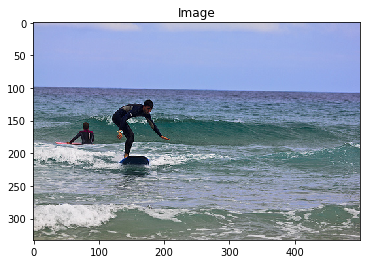

(50, 287)
Predicted Caption:-> A woman of a a opposing frame frame parking runners sneakers older dark pole hat them dirt A rage surfboard phrase take along air and women onlookers through a are pointing Three green . bite light he black holding Three opposing sports act along game out has take Crazy 
Orignal Caption:-> Two women and two out of frame people playing a game of Monopoly . 


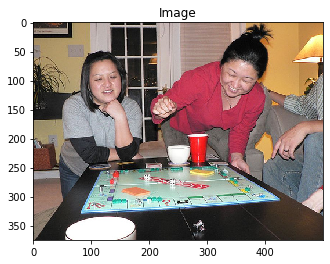

(24, 287)
Predicted Caption:-> A looking of goalie out jersey monkey a mixer an foreground , running hamburger or , red pole little paddling frame through pink 
Orignal Caption:-> Crazy looking modern day hippie listening to rage against the machine prepares to fall on his butt via skateboard . 


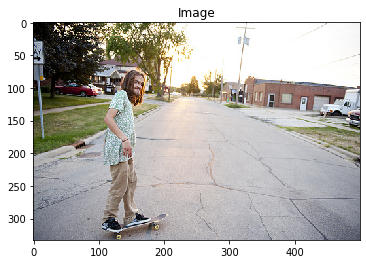

(6, 287)
Predicted Caption:-> A band playing band table 
Orignal Caption:-> An older man with white hair , a light colored shirt and dark pants hammers at a glowing-hot piece of metal that he has steadied on an anvil . 


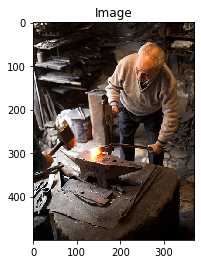

(7, 287)
Predicted Caption:-> A people in an dark has 
Orignal Caption:-> On a clear blue day , an ocean surfer catches a wave and delicately maintains his balance on the surfboard as he rides towards the shore . 


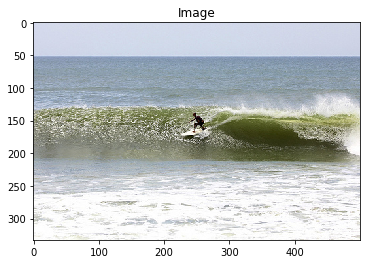

(50, 287)
Predicted Caption:-> A crowd of at ball stuffed sitting outfits background bikes runners helmet pants baseball ground female front hat player couple someone person goalie back white not pole rage the are attempts jerseys while dirt the boy over he sunshine horse not one not kayak young pole body in path 
Orignal Caption:-> A crowd of people is walking through a parking lot at night . 


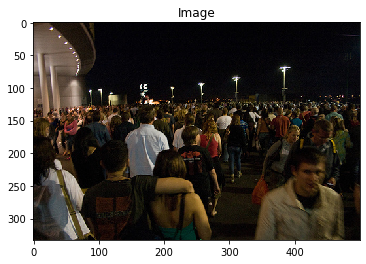

(50, 287)
Predicted Caption:-> A women of people motocross around , towards lot several for around sports off bite middle-aged goal charges of body guitarists stage goalie hamburger steadied chess an jumping green ground take it surfer shore light as off team other tent back Three rage body women jersey horse are <s> 
Orignal Caption:-> A guy in a red shirt is on his head with his feet in the air while a guy in a gray shirt and black hat looks at him . 


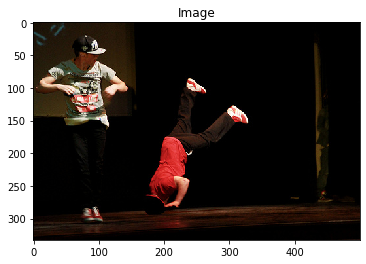

(7, 287)
Predicted Caption:-> A group of a is game 
Orignal Caption:-> A goalie in a hockey game dives to catch a puck as the opposing team charges towards the goal . 


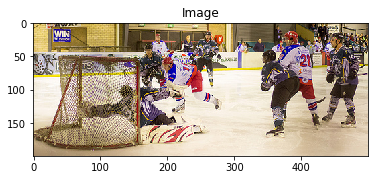

(50, 287)
Predicted Caption:-> A band in female yellow female bed Three Crazy bank performance onlookers perform man males middle-aged behind her around Nike him people tent parking glowing-hot a are guy steadied bat over hair Crazy ground jumping mixer running horse card is light 3 bite a clear riding lot stuffed two 
Orignal Caption:-> A man in a yellow helmet is kayaking in a pink kayak with the phrase 'Scrambler 11' written on the left back side . 


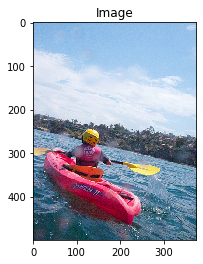

(7, 287)
Predicted Caption:-> A people in an dark has 
Orignal Caption:-> On a clear blue day , an ocean surfer catches a wave and delicately maintains his balance on the surfboard as he rides towards the shore . 


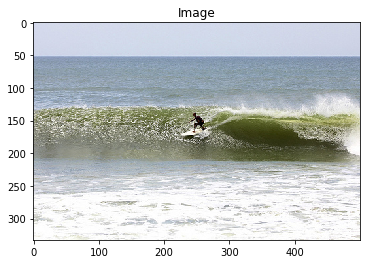

(50, 287)
Predicted Caption:-> A band in female yellow female bed Three Crazy bank performance onlookers perform man males middle-aged behind her around Nike him people tent parking glowing-hot a are guy steadied bat over hair Crazy ground jumping mixer running horse card is light 3 bite a clear riding lot stuffed two 
Orignal Caption:-> A man in a yellow helmet is kayaking in a pink kayak with the phrase 'Scrambler 11' written on the left back side . 


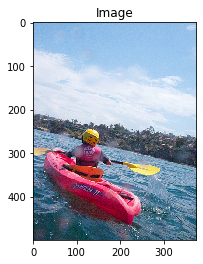

In [134]:
with tf.Session() as sess:
    sess.run(init)
    m = len(train_caption)
    for epoch in range(training_iters):
        total_cost = 0
        total_acc = 0
        for i in range(m):
            _, cst, acc = sess.run([optimizer, cost, accuracy], feed_dict = {x_caption:train_caption[i][:-1].A, x_inp:train[i:i+1], y:train_caption[i][1:].A})
            total_cost += cst
            total_acc += acc
        if (epoch + 1) % display_step == 0:
            print('After ', (epoch + 1), 'iterations: Cost = ', total_cost / m, 'and Accuracy: ', total_acc * 100/ m , '%' )
    print('Optimization finished!')
    print("Let's check")
    for tests in range(num_tests):
        image_num = random.randint(0, sample_size - 1)
        caption = sess.run(final_prediction, feed_dict = {x_inp:train[image_num:image_num + 1]})
        print(caption.shape)
        caption = np.argmax(caption[:-1], 1)
        capt = ''
        for i in caption:
            capt += rev_dict[i] + ' '
        print('Predicted Caption:->', capt)
        orig_cap = np.argmax(train_caption[image_num:image_num + 1][0][1:-1].A, 1)
        orignalcaption = ''
        for i in orig_cap:
            orignalcaption += rev_dict[i] + ' '
        print('Orignal Caption:->', orignalcaption)
        plt.imshow(real_images[image_num])
        plt.title('Image')
        plt.show()